# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

## Importing the necessary libraries

In [3]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [6]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
  
pd.set_option('display.max_columns', None)
  
pd.set_option('display.max_rows', None)

In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-news-detection/True.csv
/kaggle/input/fake-news-detection/Fake.csv


## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [8]:
data_fake=pd.read_csv('/kaggle/input/fake-news-detection/Fake.csv')
data_true=pd.read_csv('/kaggle/input/fake-news-detection/True.csv')


### **1.0** Data Understanding

In [12]:
# Inspect the DataFrame with True News to understand the given data
data_true.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [13]:
# Inspect the DataFrame with Fake News to understand the given data
data_fake.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [14]:
# Print the column details for True News DataFrame
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [15]:
# Print the column details for Fake News Dataframe
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [16]:
# Print the column names of both DataFrames
print("True DataFrame columns:", data_true.columns)
print("Fake DataFrame columns:", data_fake.columns)

True DataFrame columns: Index(['title', 'text', 'date'], dtype='object')
Fake DataFrame columns: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [17]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
data_true['news_label']=1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
data_fake["news_label"]=0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [18]:
# Combine the true and fake news DataFrames into a single DataFrame
data_merge=pd.concat([data_fake, data_true], axis = 0)


In [19]:
# Display the first 5 rows of the combined DataFrame to verify the result
data_merge.head(5)

,title,text,date,news_label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before th

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [20]:
# Check Presence of Null Values
data_merge.isnull().sum() 

title         21
text          21
date          42
news_label     0
dtype: int64

In [21]:
# Handle Rows with Null Values
data_merge=data_merge.fillna(' ')
data_merge.isnull().sum() 

title         0
text          0
date          0
news_label    0
dtype: int64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [30]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
# Drop the irrelevant columns from the DataFrame as they are no longer needed
# Display the first 5 rows of the updated DataFrame to check the result
news_text = data_merge.drop(['title','date'], axis = 1)
news_text.head(5)

,text,news_label
0,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",0
1,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Trump ran with him being merely a coffee boy.In May 2016, Papadopoulos revealed to Australian diplomat Al

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

In [23]:
# convert the text in lowercase, remove the extra space, special chr., ulr and links.
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('not') #removing not from the stop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    text = re.sub(r'\W', ' ', text) # Remove all the special characters
    text = re.sub(r'\d+', '', text) # remove numerical values
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # remove all single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # Remove single characters from the start
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Substituting multiple spaces with single space
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split()) # perform lemmatization to get the root of english words
    return text

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



In [31]:
news_text['text'] = news_text['text'].apply(clean_text)
news_text.columns

Index(['text', 'news_label'], dtype='object')

#### 2.1.0 Create a new DataFrame to store the processed data



In [33]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = news_text
# Add 'news_label' column to the new dataframe for topic identification

df_clean.columns


Index(['text', 'news_label'], dtype='object')

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
### Functional already written above, all in one

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
## Already stored in a data frame above>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


### Save the Cleaned data as a csv file (Recommended)

In [35]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [36]:
# Check the first few rows of the DataFrame
df_clean.head()

,text,news_label
0,donald trump wish american happy new year leave that instead give shout enemy hater dishonest fake news medium former reality show star one job it country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald trump realdonaldtrump december trump tweet went welll expect what kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december no one like calvin calvinstowell december your impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december do hear talk include many people hate wonder hate me alan sandoval alansandoval december who us word hater new year wish marlene marlene december you say happy new year koren pollitt korencarpenter december here trump new year eve tweet happy new year all including many enemy fought lost badly know do love donald trump realdonaldtrump december this nothing new trump year trump directed message enemy hater new year easter thanksgiving anniversary pic twitter com fpaekypa daniel dale ddale december trump holiday tweet clearly not presidential how long work hallmark becoming president steven goodine sgoodine december he always like difference last year filter breaking down roy schulze thbthttt december who apart teenager us term hater wendy wendywhistles december he fucking year old know rainyday december so people voted hole thinking would change got power wrong year old men change year older photo andrew burton getty image,0
1,house intelligence committee chairman devin nunes going bad day assumption like many u christopher steele dossier prompted russia investigation lashing department justice fbi order protect trump happens dossier not started investigation according document obtained new york time former trump campaign adviser george papadopoulos drunk wine bar revealed knowledge russian opposition research hillary clinton on top that papadopoulos covfefe boy trump administration alleged much larger role none damning drunken fool wine bar coffee boy help arrange new york meeting trump president abdel fattah el sisi egypt two month election known former aide set meeting world leader trump team trump ran merely coffee boy in may papadopoulos revealed australian diplomat alexander downer russian official shopping around possible dirt then democratic presidential nominee hillary clinton exactly much mr papadopoulos said night kensington wine room australian alexander downer unclear report state two month later leaked democratic email began appearing online australian official passed information mr papadopoulos american counterpart according four current former american foreign official direct knowledge australian role papadopoulos pleaded guilty lying b cooperating witness special counsel robert mueller team this presidency badly scripted reality tv show photo win mcnamee getty image,0
2,friday revealed former milwaukee sheriff david clarke considered homeland security secretary donald trump administration email scandal own in january brief run in plane clarke fellow passenger dan black later detained police reason whatsoever except maybe feeling hurt clarke messaged police stop black deplaned now search warrant executed fbi see exchange clarke calling fake news even though copy search warrant internet unintimidated lib medium attempt smear discredit fake news report designed silence me former sheriff tweeted continue poke eye sharp stick bitch slap scum bag til get it attacked better people maga unintimidated lib medium attempt smear discredit fake news report designed silence me continue poke eye

In [37]:
# Check the dimensions of the DataFrame
df_clean.shape

(44940, 2)

In [45]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum() 
df_clean['text'] = df_clean['text'].fillna('')  # Replace missing values with empty strings

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [47]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
x = df_clean['text']
y = df_clean['news_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_clean['char_length'] = df_clean['text'].apply(len)  
#df_clean['char_length_lem']= df_clean['lemmatized_text'].apply(len) 
x = df_clean['text']
y = df_clean['news_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)



##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

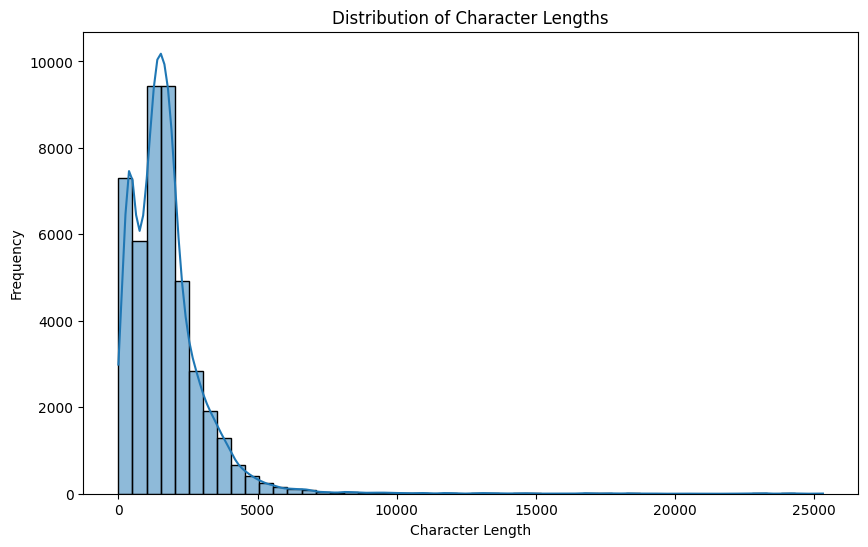

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(df_clean['char_length'], bins=50, kde=True)  # Adjust bins and kde as needed
plt.title('Distribution of Character Lengths')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [97]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News
x_train.head()
true_news_indices = y_train[y_train == 1].index
true_news = x_train.loc[true_news_indices]
true_news_text = true_news.astype(str).replace({float('nan'): ''}, regex=True)


'text'

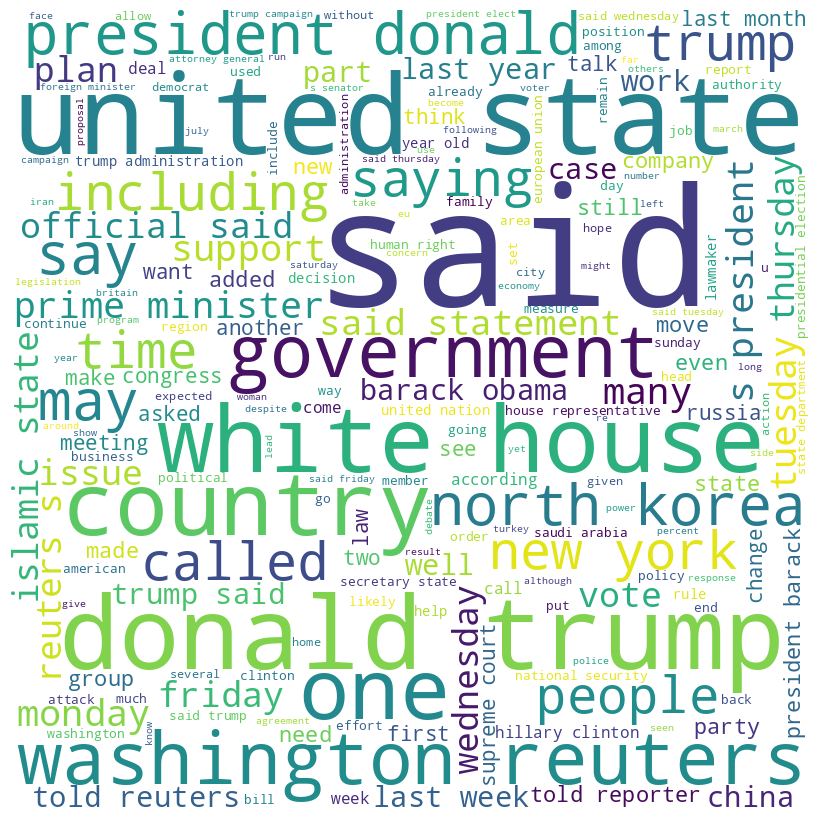

In [98]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews = ' '.join(true_news_text.astype(str).tolist())  # Access the values directly using .values
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)
#plt graph
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

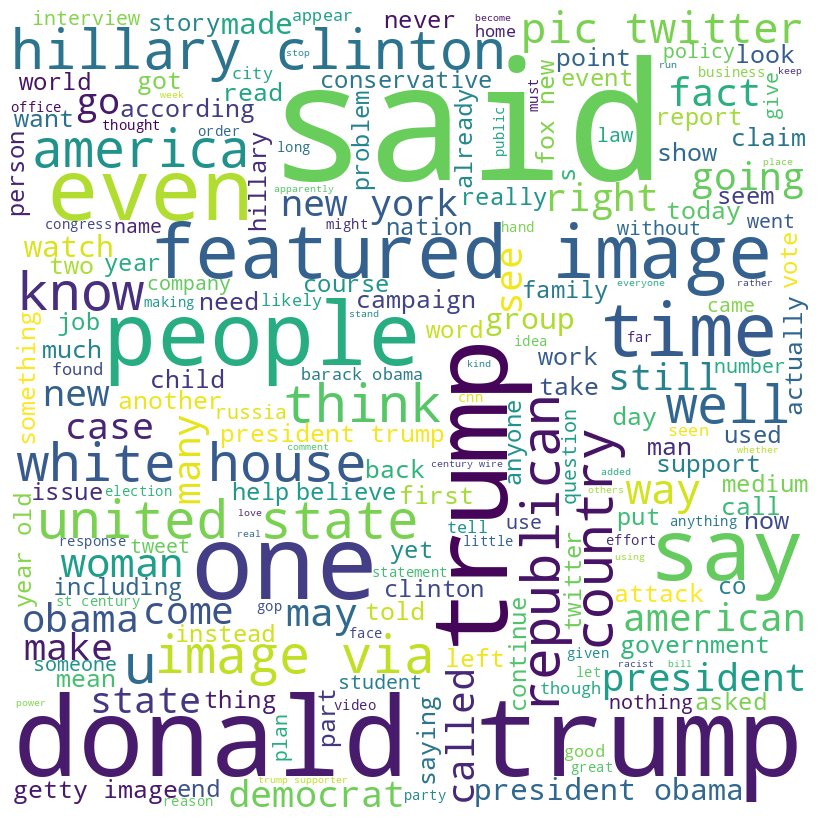

In [100]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News
x_train.head()
fake_news_indices = y_train[y_train == 0].index
fake_news = x_train.loc[fake_news_indices]
fake_news_text = fake_news.astype(str).replace({float('nan'): ''}, regex=True)
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews = ' '.join(fake_news_text.astype(str).tolist())  # Access the values directly using .values
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)
#plt graph
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [101]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

In [110]:
# Write a function to get the specified top n-grams
def get_top_ngrams(text, n, top_k=10):
  
    all_ngrams = []

    if isinstance(text, pd.Series):
        for item in text.astype(str):  # Iterate and convert to string within the loop
            if pd.isnull(item) or item == '':
                continue  # Skip NaN or empty strings
            tokens = word_tokenize(item)  # Tokenize the text
            ngrams_list = list(ngrams(tokens, n))  # Generate n-grams
            all_ngrams.extend(ngrams_list)  # Add to the overall list
    else:
        text = str(text)
        if pd.isnull(text) or text == '':  # Handle single NaN or empty string
            return []
        tokens = word_tokenize(text)  # Tokenize the text
        ngrams_list = list(ngrams(tokens, n))  # Generate n-grams
        all_ngrams.extend(ngrams_list)  # Add to the overall list

    ngram_freq = Counter(all_ngrams)  # Count n-gram frequencies
    top_ngrams = ngram_freq.most_common(top_k)  # Get the top k n-grams

    return top_ngrams

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data
## Already coded in the function above please check

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

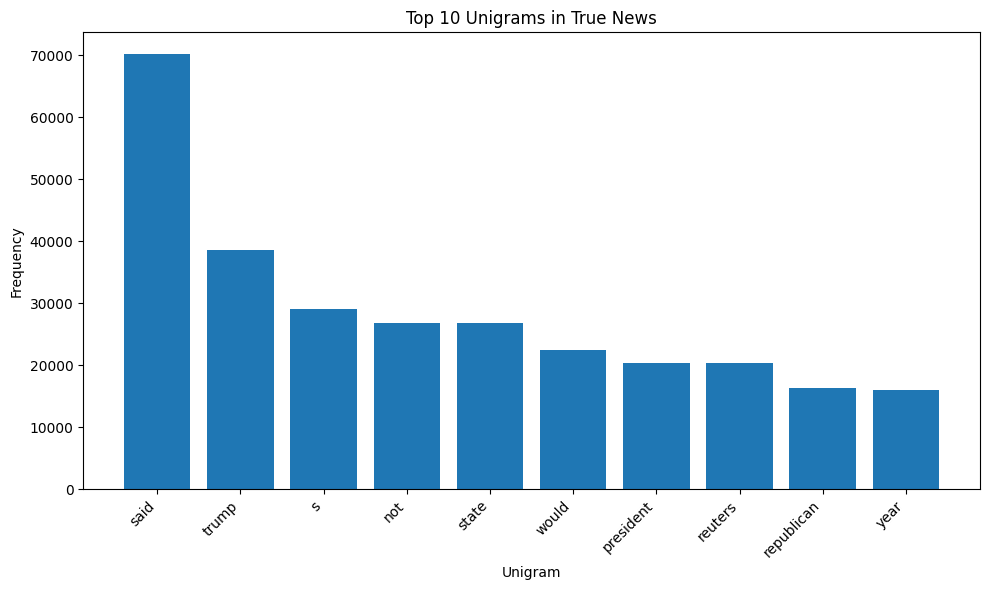

In [113]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph

top_true_unigrams = get_top_ngrams(true_news_text, n=1, top_k=10)
unigrams = [unigram[0][0] for unigram in top_true_unigrams]  # Extract unigrams
frequencies = [unigram[1] for unigram in top_true_unigrams]  # Extract frequencies
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(unigrams, frequencies)
plt.title('Top 10 Unigrams in True News')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



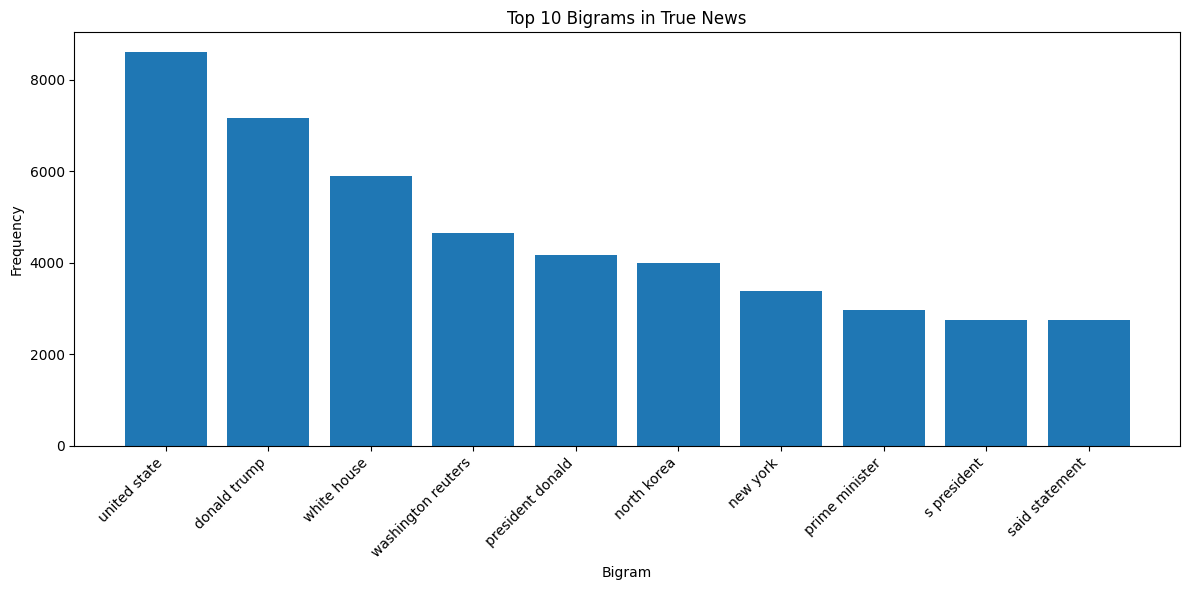

In [115]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
top_true_bigrams = get_top_ngrams(true_news_text, n=2, top_k=10)
bigrams = [' '.join(bigram[0]) for bigram in top_true_bigrams]  # Join bigram words with space
frequencies = [bigram[1] for bigram in top_true_bigrams]  # Extract frequencies
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.bar(bigrams, frequencies)
plt.title('Top 10 Bigrams in True News')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



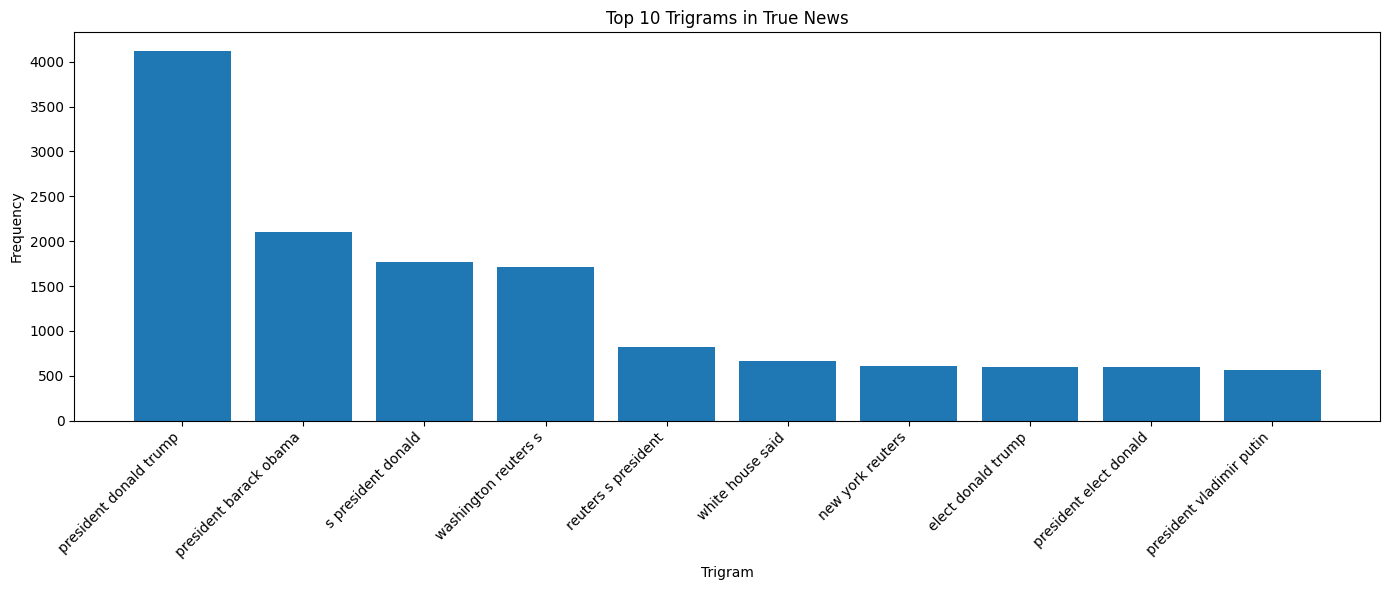

In [116]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
top_true_trigrams = get_top_ngrams(true_news_text, n=3, top_k=10)
trigrams = [' '.join(trigram[0]) for trigram in top_true_trigrams]  # Join trigram words with spaces
frequencies = [trigram[1] for trigram in top_true_trigrams]  # Extract frequencies
plt.figure(figsize=(14, 6))  # Adjust figure size if needed
plt.bar(trigrams, frequencies)
plt.title('Top 10 Trigrams in True News')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

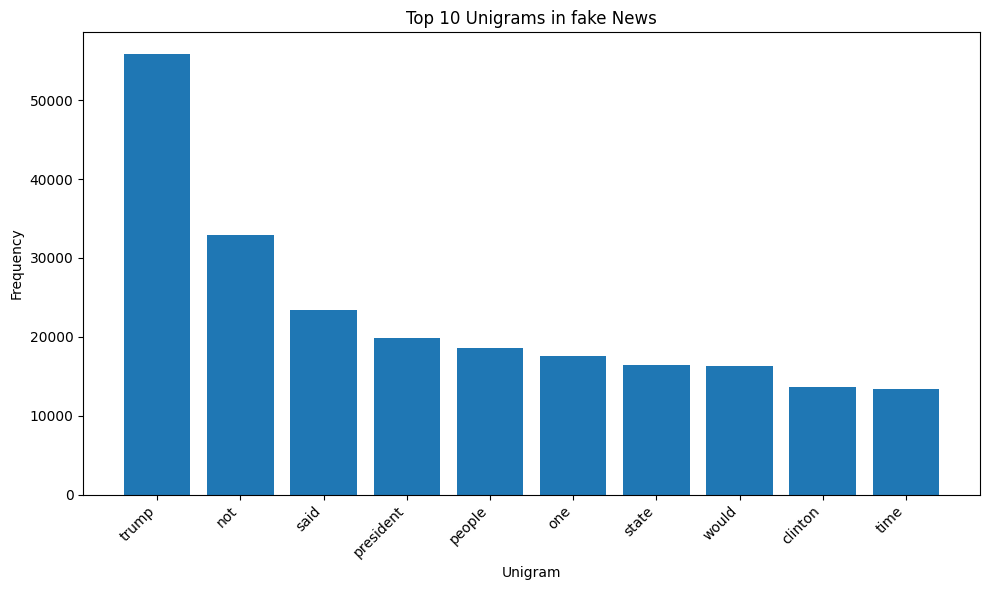

In [117]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
top_fake_unigrams = get_top_ngrams(fake_news_text, n=1, top_k=10)
unigrams = [unigram[0][0] for unigram in top_fake_unigrams]  # Extract unigrams
frequencies = [unigram[1] for unigram in top_fake_unigrams]  # Extract frequencies
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(unigrams, frequencies)
plt.title('Top 10 Unigrams in fake News')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



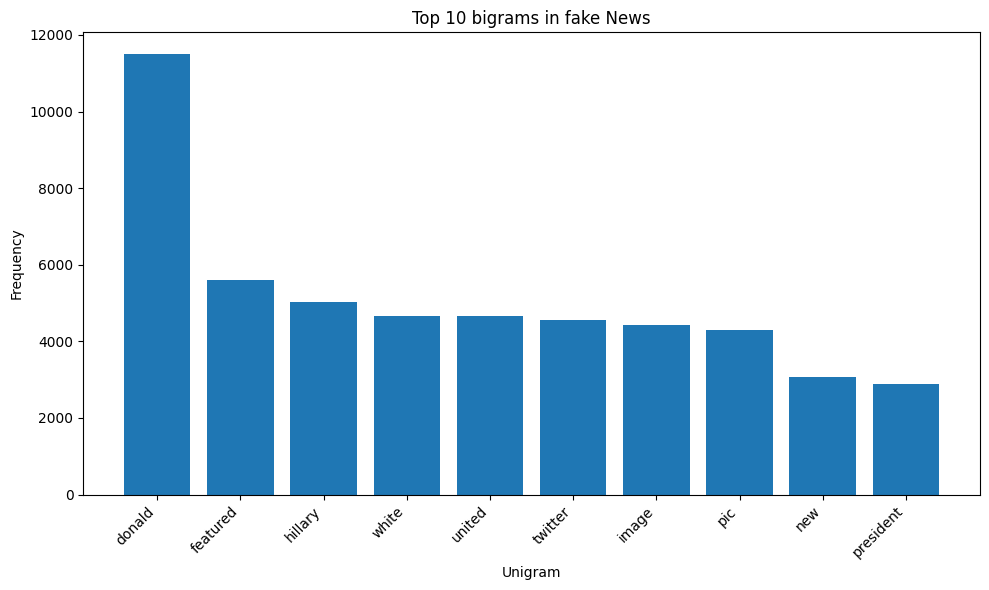

In [118]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
top_fake_unigrams = get_top_ngrams(fake_news_text, n=2, top_k=10)
unigrams = [unigram[0][0] for unigram in top_fake_unigrams]  # Extract unigrams
frequencies = [unigram[1] for unigram in top_fake_unigrams]  # Extract frequencies
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(unigrams, frequencies)
plt.title('Top 10 bigrams in fake News')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



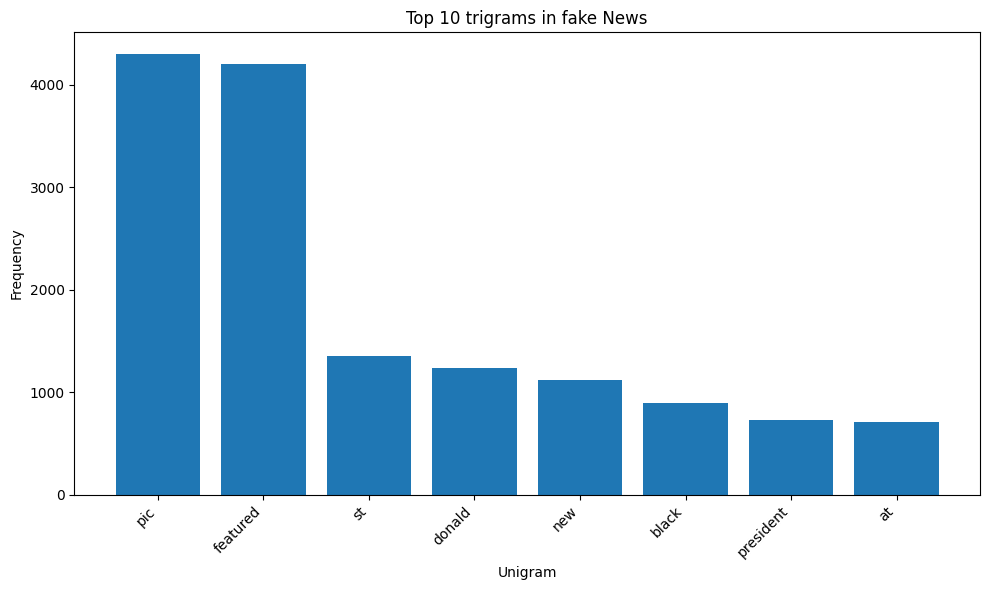

In [119]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
top_fake_unigrams = get_top_ngrams(fake_news_text, n=3, top_k=10)
unigrams = [unigram[0][0] for unigram in top_fake_unigrams]  # Extract unigrams
frequencies = [unigram[1] for unigram in top_fake_unigrams]  # Extract frequencies
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(unigrams, frequencies)
plt.title('Top 10 trigrams in fake News')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [139]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
import os

print(dir(api))  # Check if `create_cache()` is in the list of attributes.

['BASE_DIR', 'DATA_LIST_URL', 'DOWNLOAD_BASE_URL', '_DEFAULT_BASE_DIR', '_PARENT_DIR', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_calculate_md5_checksum', '_create_base_dir', '_download', '_get_checksum', '_get_filename', '_get_parts', '_load_info', '_progress', 'absolute_import', 'argparse', 'base_dir', 'errno', 'hashlib', 'info', 'io', 'json', 'load', 'logger', 'logging', 'math', 'os', 'partial', 'shutil', 'sys', 'tempfile', 'urllib', 'urlopen']


In [140]:
import gensim
import gensim.downloader as api
import os
import json
import requests

# Check gensim version
print(f"Gensim version: {gensim.__version__}")

if gensim.__version__ >= '4.0.0':
    gensim.downloader.BASE_DIR = 'gensim-data'  # or any other path
    os.makedirs(gensim.downloader.BASE_DIR, exist_ok=True)  # Create the directory if it doesn't exist
    # manually download information.json
    url = "https://raw.githubusercontent.com/RaRe-Technologies/gensim-data/master/list.json"
    response = requests.get(url)
    data = response.json()

    with open(os.path.join(gensim.downloader.BASE_DIR, 'information.json'), 'w') as f:
        json.dump(data, f)
    # then you can use:
    info = gensim.downloader.info()
    wv = api.load('word2vec-google-news-300')
else:
    print("gensim version is older than 4.0.0, consider updating it.")

Gensim version: 4.3.3


ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /RaRe-Technologies/gensim-data/master/list.json (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f83a5540190>: Failed to resolve 'raw.githubusercontent.com' ([Errno -3] Temporary failure in name resolution)"))

### 3**6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [124]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
def extract_vectors(text_data, wv):
   
    document_vectors = []
    for text in text_data:
        # Tokenize the text
        tokens = word_tokenize(text)
        
        # Get vectors for valid tokens and average them
        vectors = [wv[token] for token in tokens if token in wv]
        if vectors:  # Check if any valid vectors were found
            document_vector = np.mean(vectors, axis=0)
        else:
            document_vector = np.zeros(wv.vector_size)  # Use zero vector if no valid tokens

        document_vectors.append(document_vector)

    return np.array(document_vectors)

## Extract the target variable for the training data and validation data
training_vectors = extract_vectors(x_train, wv)
validation_vectors = extract_vectors(x_test, wv)

NameError: name 'wv' is not defined

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [146]:
## Initialise Logistic Regression model
from sklearn.linear_model import LogisticRegression
## Train Logistic Regression model on training data
LR = LogisticRegression()
LR.fit(xv_train, y_train)
## Predict on validation data
pred_lr = LR.predict(xv_test)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [160]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
LR.score(xv_test, y_test)

0.9880581516095535

In [149]:
# Classification Report
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7107
           1       0.99      0.99      0.99      6375

    accuracy                           0.99     13482
   macro avg       0.99      0.99      0.99     13482
weighted avg       0.99      0.99      0.99     13482



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [151]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier

## Train Decision Tree model on training data
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
## Predict on validation data
pred_dt = DT.predict(xv_test)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [159]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
DT.score(xv_test, y_test)

0.9948078920041536

In [153]:
# Classification Report
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7107
           1       0.99      0.99      0.99      6375

    accuracy                           0.99     13482
   macro avg       0.99      0.99      0.99     13482
weighted avg       0.99      0.99      0.99     13482



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [156]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

## Train Random Forest model on training data
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)
## Predict on validation data
pred_rf = RF.predict(xv_test)


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [157]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
RF.score(xv_test, y_test)

0.9931760866340306

In [158]:
# Classification Report
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7107
           1       0.99      0.99      0.99      6375

    accuracy                           0.99     13482
   macro avg       0.99      0.99      0.99     13482
weighted avg       0.99      0.99      0.99     13482



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.